In [1]:
#Data Preproessing.

import json

with open("gen_img_data.json", "r") as read_file:
    data = json.load(read_file)
    
# Arragning the data in lists

Imgs = [v for f in data for k , v in f.items()]
labels = [k for f in data for k , v in f.items()]
setLable = {k for f in data for k , v in f.items()}
setLable = sorted(list(setLable))
num_classes = len(setLable)
Indexlist = []

for ind in setLable:
    index = setLable.index(ind)
    Indexlist.append(index)


print(len(Imgs))
print(len(labels))
print(setLable)
print(Indexlist)


#Assigning classes to specfic index number
# ['Ankle boot', 'Bag', 'Sandal', 'automobile', 'bird', 'truck']
# [    0,          1,     2,          3,          4 ,      5   ]


IndexLabel = []
for l in labels:
    if l == 'Bag':
        IndexLabel.append(setLable.index(l))
    if l == 'Sandal':
        IndexLabel.append(setLable.index(l))
    if l == 'Ankle boot':
        IndexLabel.append(setLable.index(l))
    if l == 'automobile':
        IndexLabel.append(setLable.index(l))
    if l == 'truck':
        IndexLabel.append(setLable.index(l))
    if l == 'bird':
        IndexLabel.append(setLable.index(l))


print(len(IndexLabel))
print(labels[:20])
print(IndexLabel[:20])



23702
23702
['Ankle boot', 'Bag', 'Sandal', 'automobile', 'bird', 'truck']
[0, 1, 2, 3, 4, 5]
23702
['Ankle boot', 'Sandal', 'Sandal', 'Ankle boot', 'Sandal', 'Sandal', 'Ankle boot', 'Bag', 'Sandal', 'Bag', 'Sandal', 'Ankle boot', 'Sandal', 'Ankle boot', 'Bag', 'Sandal', 'Sandal', 'Sandal', 'Ankle boot', 'Sandal']
[0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2]


In [3]:
#Reshaping your data

import numpy as np

ReshapeImage = []
rgf = []

for x in Imgs:
    if(x.get('grey')):
        img = np.array(x.get('grey'))
        img  = np.reshape(img, (28, 28))
        ReshapeImage.append(img)
    else:
        red = np.array(x.get('R'))
        green = np.array(x.get('G'))
        blue = np.array(x.get('B'))
        rgbArray = np.reshape(red, (32, 32))
        rgbArray = np.reshape(green, (32, 32))
        rgbArray = np.reshape(blue, (32, 32))
        rgf.append(rgbArray)
        rgbArray = np.resize(rgbArray, (28,28))
        ReshapeImage.append(rgbArray)
print(ReshapeImage[23700].shape)
print(len(rgf))



(28, 28)
10501


In [54]:
# More Reshaping your data


train_data = np.array([i for i in ReshapeImage]).reshape(len(ReshapeImage), 28 ,28)
labels = np.array(IndexLabel)


print(train_data.shape)
print(labels.shape)


(23702, 28, 28)
(23702,)


In [95]:
#spliting your data into Training and Testing Data


from sklearn.model_selection import train_test_split

(x_train, y_train, x_test, y_test) = train_test_split(train_data, labels, test_size=0.1, random_state=0)

print(len(x_train))
print(type(x_train))
print(x_train.shape)

print(len(y_train))
print(type(y_train))
print(y_train.shape)

print(len(x_test))
print(type(x_test))
print(x_test.shape)

print(len(y_test))
print(type(y_test))
print(y_test.shape)

21331
<class 'numpy.ndarray'>
(21331, 28, 28)
2371
<class 'numpy.ndarray'>
(2371, 28, 28)
21331
<class 'numpy.ndarray'>
(21331,)
2371
<class 'numpy.ndarray'>
(2371,)


In [96]:
# After spliting more reshape data

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_train /= 255
y_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(y_train.shape[0], 'test samples')

x_train shape: (21331, 28, 28)
21331 train samples
2371 test samples


In [97]:
# Import Keras Library

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [98]:
# convert class vectors to binary class matrices
x_test = keras.utils.to_categorical(x_test, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [99]:
#mini batch gradient descent ftw
batch_size = 128

epochs = 50

# input image dimensions
#28x28 pixel images.
img_rows, img_cols = 28, 28

In [100]:
# Set channel here

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    y_train = y_train.reshape(y_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    print("channels_first " , input_shape)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    y_train = y_train.reshape(y_train.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    print("channels_last " , input_shape)

channels_last  (28, 28, 1)


In [101]:
#Model
#Create model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [102]:
#train that ish!
model.fit(x_train, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y_train, y_test))

score = model.evaluate(y_train, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 21331 samples, validate on 2371 samples
Epoch 1/50
21331/21331 [==============================] - 13s 632us/step - loss: 0.4756 - accuracy: 0.8190 - val_loss: 0.3118 - val_accuracy: 0.8996
Epoch 2/50
21331/21331 [==============================] - 15s 682us/step - loss: 0.2965 - accuracy: 0.8925 - val_loss: 0.2373 - val_accuracy: 0.9190
Epoch 3/50
21331/21331 [==============================] - 14s 673us/step - loss: 0.2568 - accuracy: 0.9054 - val_loss: 0.2450 - val_accuracy: 0.9093
Epoch 4/50
21331/21331 [==============================] - 14s 663us/step - loss: 0.2427 - accuracy: 0.9114 - val_loss: 0.2137 - val_accuracy: 0.9169
Epoch 5/50
21331/21331 [==============================] - 14s 671us/step - loss: 0.2270 - accuracy: 0.9165 - val_loss: 0.2558 - val_accuracy: 0.9127
Epoch 6/50
21331/21331 [==============================] - 15s 683us/step - loss: 0.2154 - accuracy: 0.9221 - val_loss: 0.2102 - val_accuracy: 0.9224
Epoch 7/50
21331/21331 [==============================] -

In [103]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to h5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Loaded Model from disk
3
This is a automobile


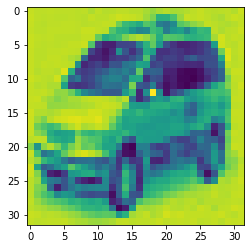

5
This is a truck


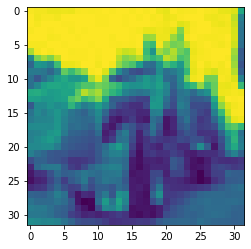

2
This is a Sandal


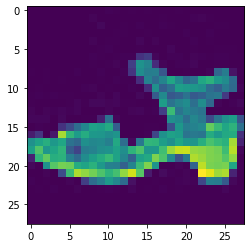

5
This is a truck


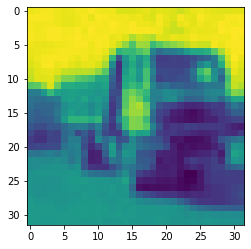

0
This is a Ankle boot


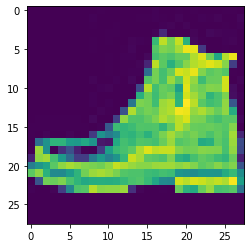

5
This is a truck


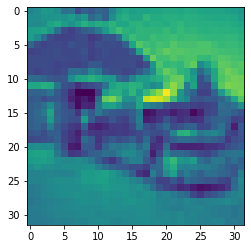

0
This is a Ankle boot


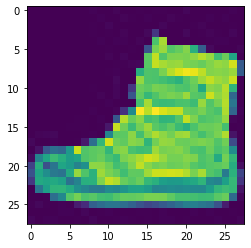

0
This is a Ankle boot


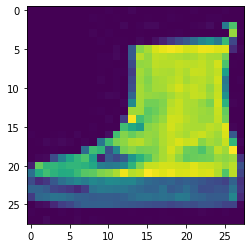

5
This is a truck


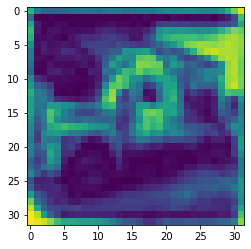

2
This is a Sandal


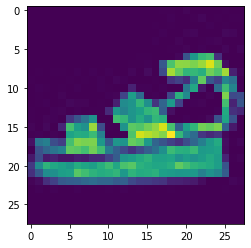

1
This is a Bag


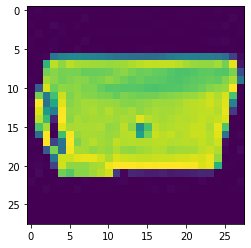

5
This is a truck


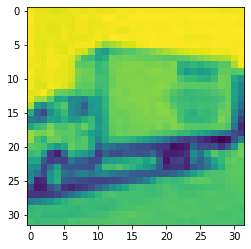

2
This is a Sandal


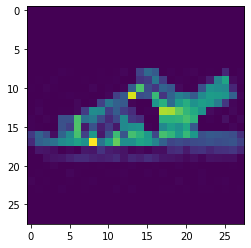

1
This is a Bag


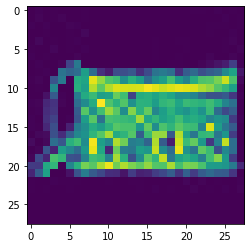

2
This is a Sandal


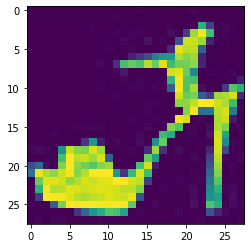

0
This is a Ankle boot


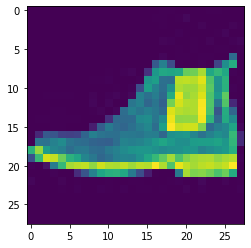

4
This is a bird


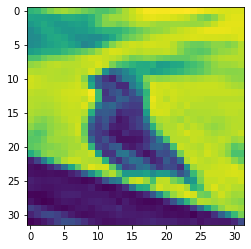

4
This is a bird


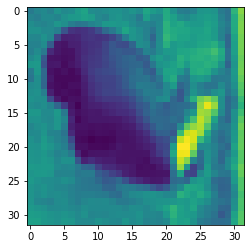

3
This is a automobile


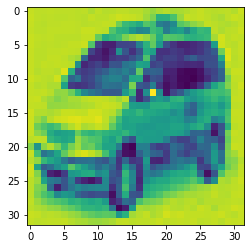

4
This is a bird


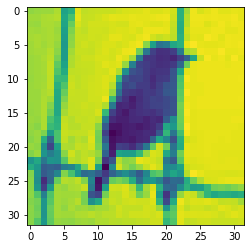

5
This is a truck


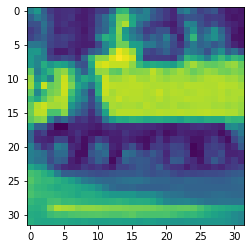

5
This is a truck


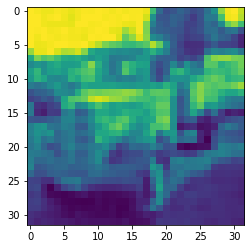

1
This is a Bag


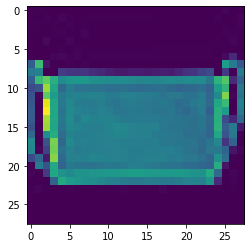

3
This is a automobile


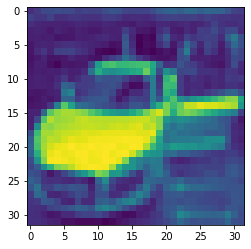

3
This is a automobile


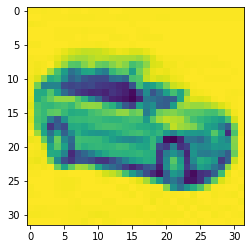

0
This is a Ankle boot


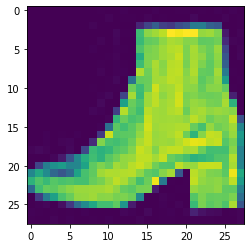

2
This is a Sandal


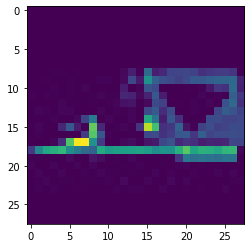

4
This is a bird


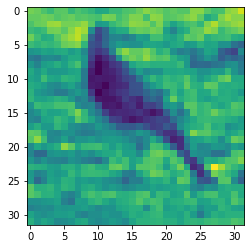

1
This is a Bag


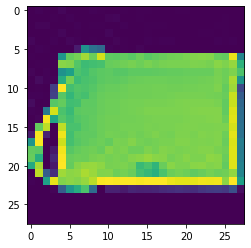

4
This is a bird


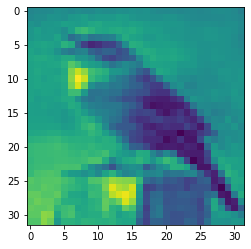

1
This is a Bag


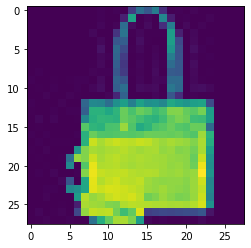

4
This is a bird


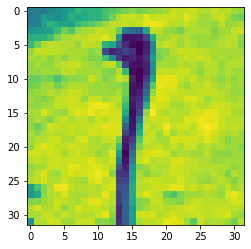

0
This is a Ankle boot


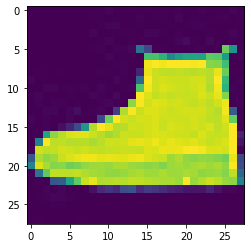

5
This is a truck


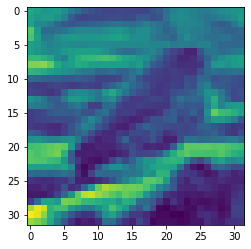

0
This is a Ankle boot


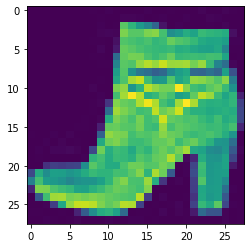

5
This is a truck


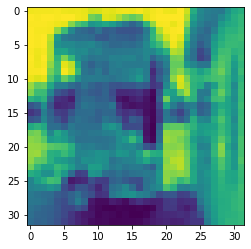

1
This is a Bag


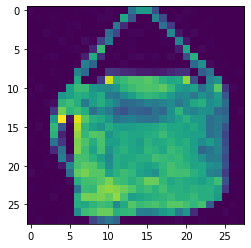

2
This is a Sandal


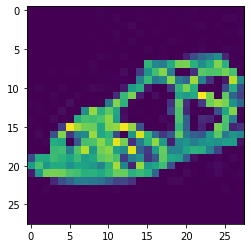

0
This is a Ankle boot


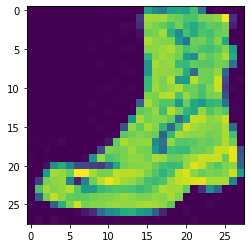

5
This is a truck


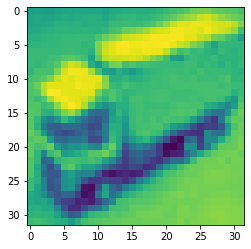

2
This is a Sandal


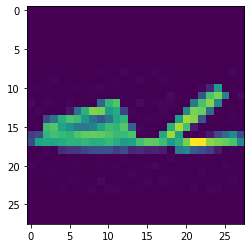

5
This is a truck


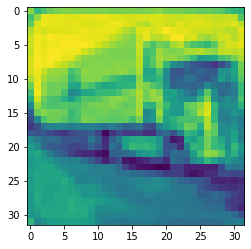

1
This is a Bag


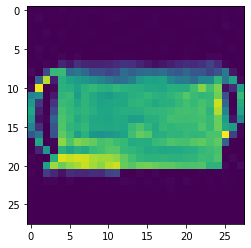

1
This is a Bag


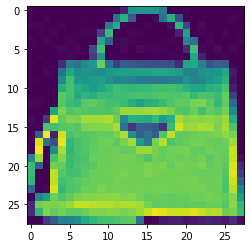

0
This is a Ankle boot


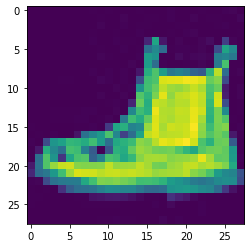

5
This is a truck


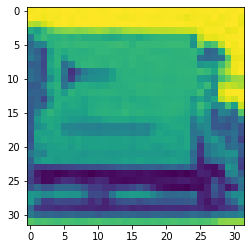

0
This is a Ankle boot


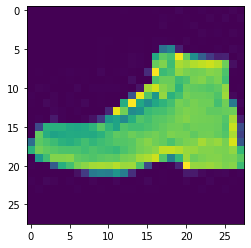

2
This is a Sandal


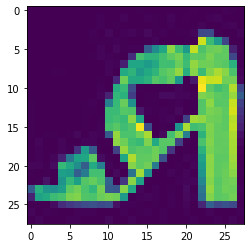

5
This is a truck


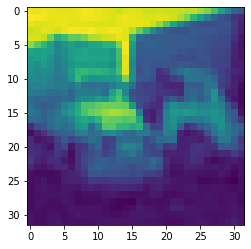

5
This is a truck


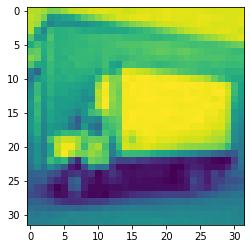

0
This is a Ankle boot


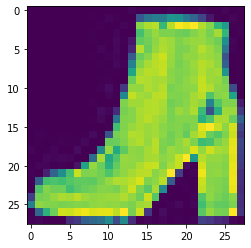

5
This is a truck


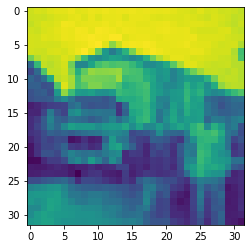

4
This is a bird


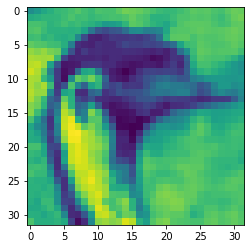

1
This is a Bag


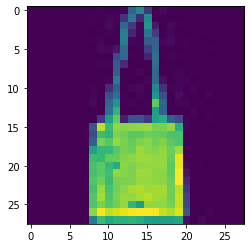

3
This is a automobile


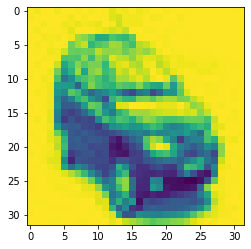

1
This is a Bag


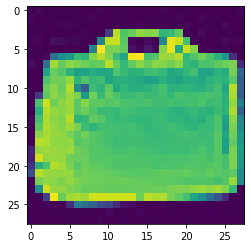

3
This is a automobile


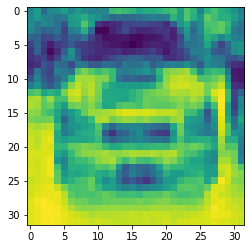

0
This is a Ankle boot


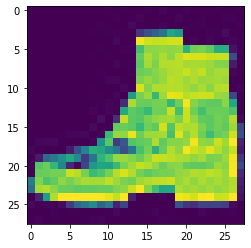

5
This is a truck


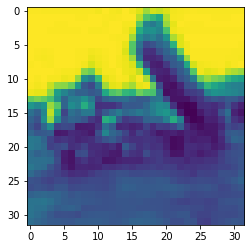

5
This is a truck


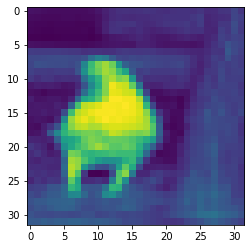

0
This is a Ankle boot


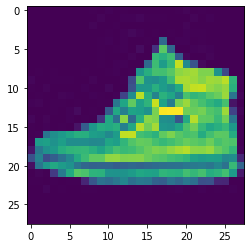

0
This is a Ankle boot


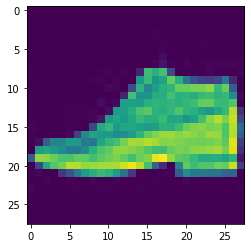

5
This is a truck


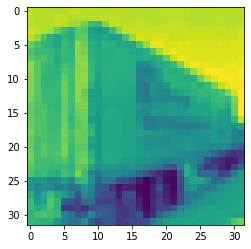

4
This is a bird


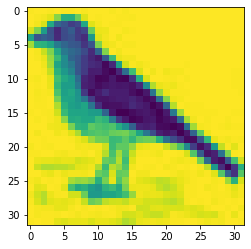

2
This is a Sandal


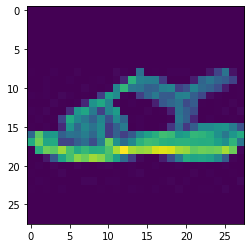

5
This is a truck


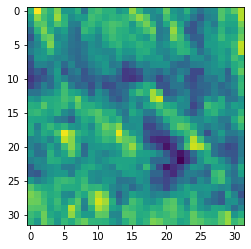

1
This is a Bag


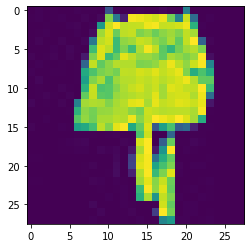

4
This is a bird


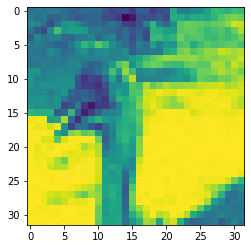

1
This is a Bag


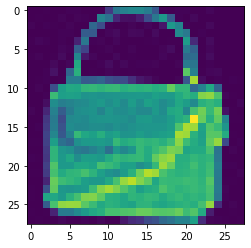

2
This is a Sandal


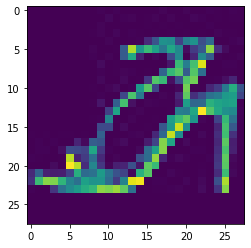

1
This is a Bag


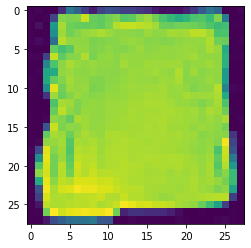

3
This is a automobile


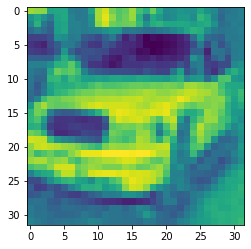

4
This is a bird


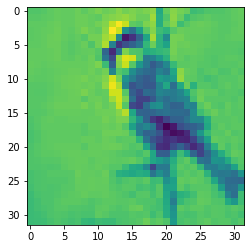

2
This is a Sandal


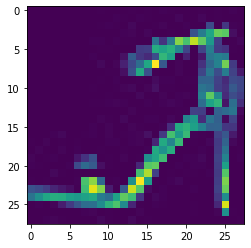

2
This is a Sandal


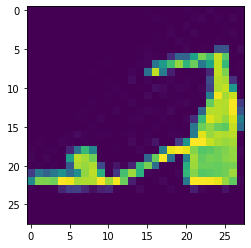

5
This is a truck


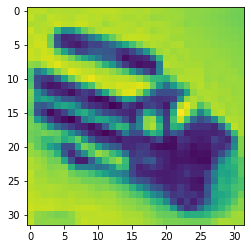

2
This is a Sandal


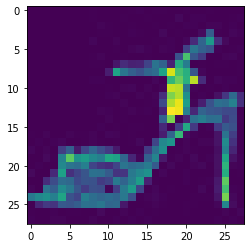

0
This is a Ankle boot


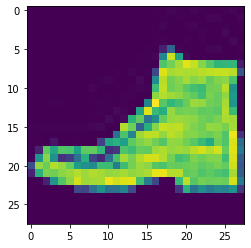

3
This is a automobile


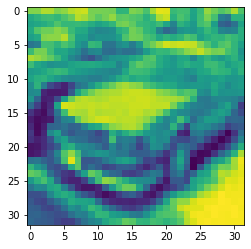

5
This is a truck


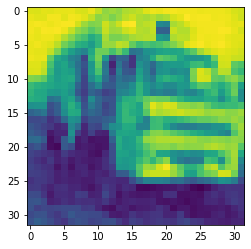

4
This is a bird


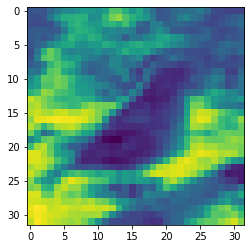

1
This is a Bag


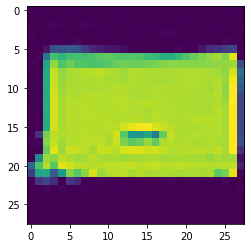

5
This is a truck


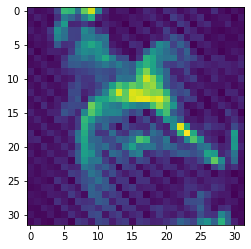

5
This is a truck


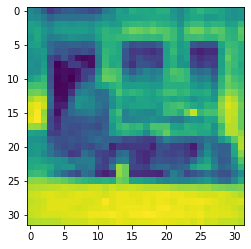

1
This is a Bag


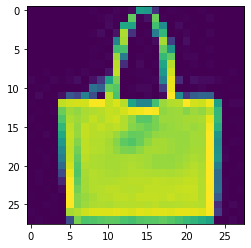

1
This is a Bag


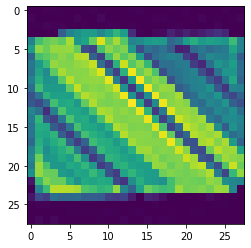

1
This is a Bag


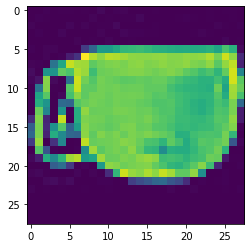

0
This is a Ankle boot


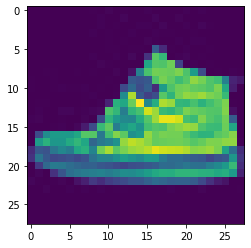

4
This is a bird


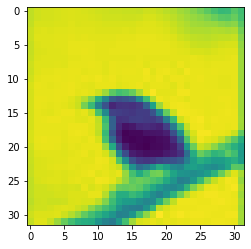

1
This is a Bag


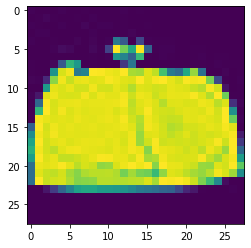

2
This is a Sandal


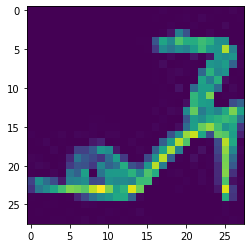

4
This is a bird


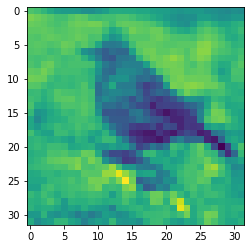

4
This is a bird


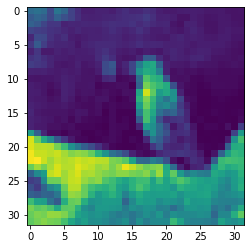

3
This is a automobile


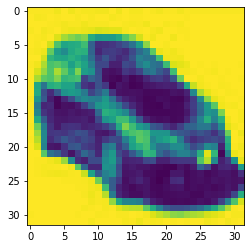

4
This is a bird


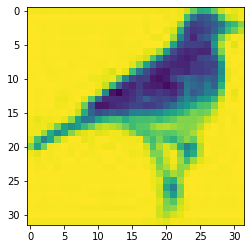

3
This is a automobile


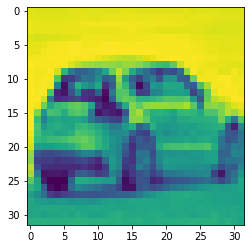

5
This is a truck


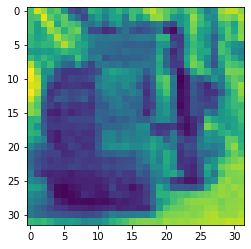

4
This is a bird


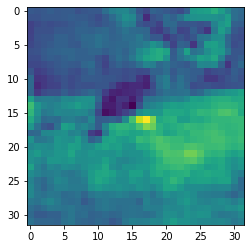

0
This is a Ankle boot


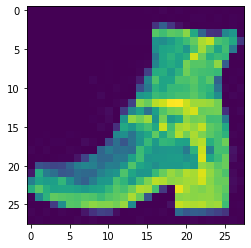

5
This is a truck


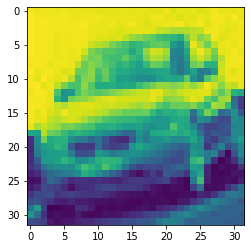

3
This is a automobile


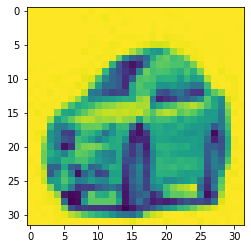

1
This is a Bag


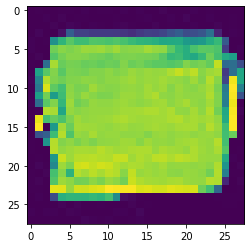

2
This is a Sandal


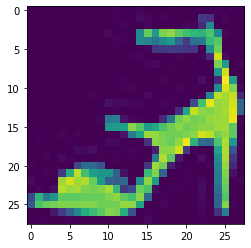

3
This is a automobile


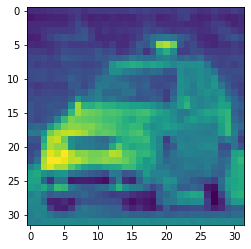

4
This is a bird


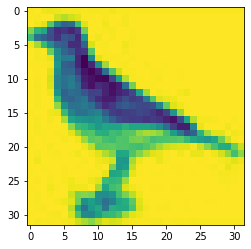

3
This is a automobile


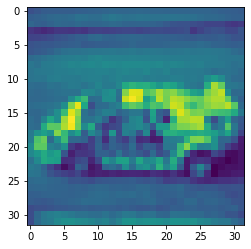

5
This is a truck


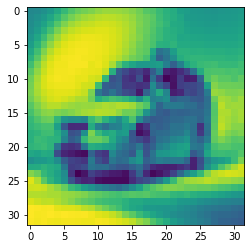

0
This is a Ankle boot


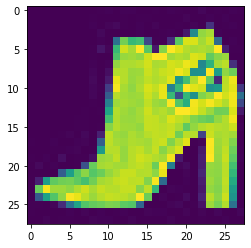

3
This is a automobile


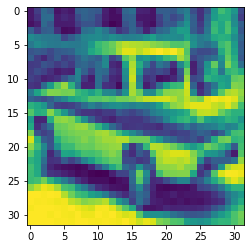

4
This is a bird


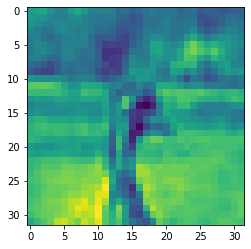

5
This is a truck


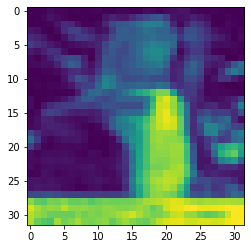

5
This is a truck


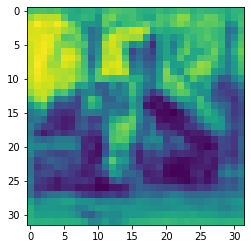

5
This is a truck


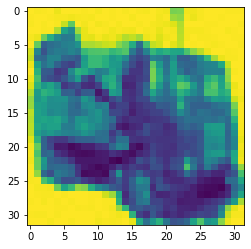

3
This is a automobile


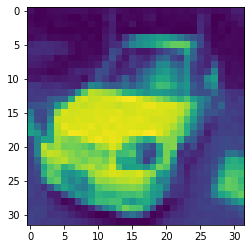

5
This is a truck


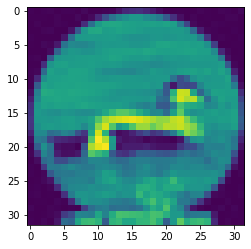

1
This is a Bag


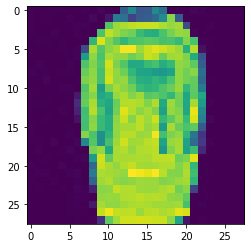

2
This is a Sandal


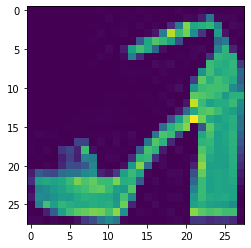

5
This is a truck


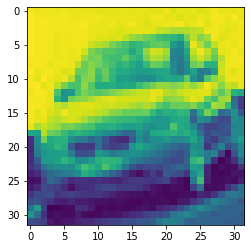

0
This is a Ankle boot


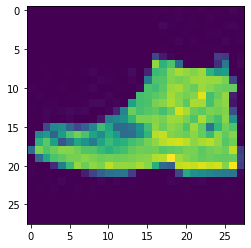

2
This is a Sandal


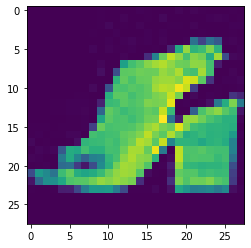

1
This is a Bag


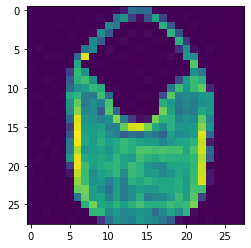

1
This is a Bag


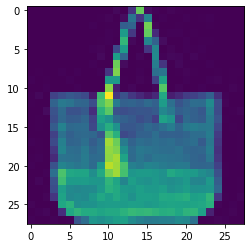

5
This is a truck


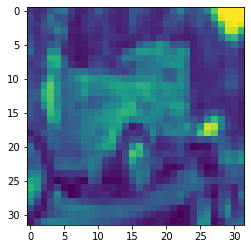

3
This is a automobile


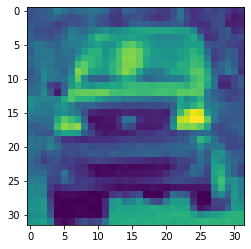

3
This is a automobile


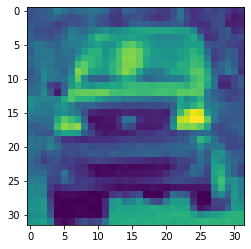

0
This is a Ankle boot


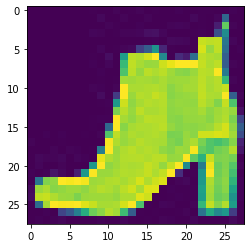

0
This is a Ankle boot


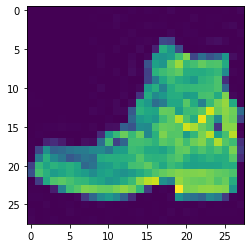

5
This is a truck


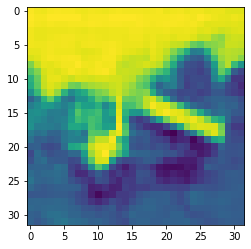

5
This is a truck


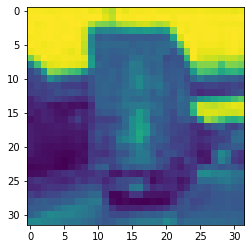

3
This is a automobile


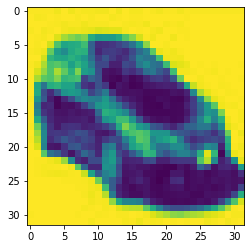

0
This is a Ankle boot


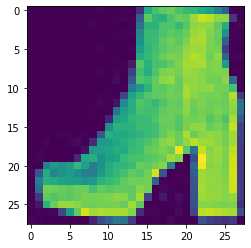

0
This is a Ankle boot


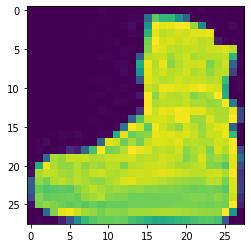

3
This is a automobile


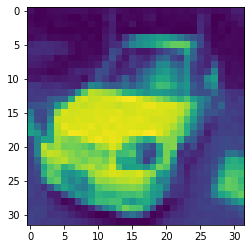

3
This is a automobile


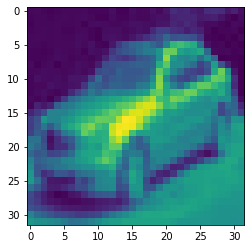

2
This is a Sandal


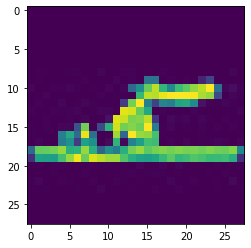

0
This is a Ankle boot


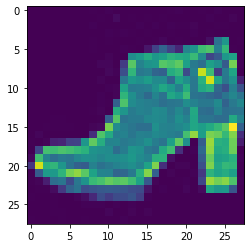

5
This is a truck


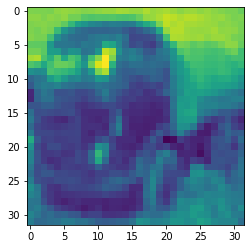

4
This is a bird


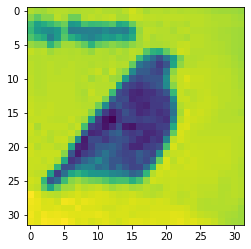

0
This is a Ankle boot


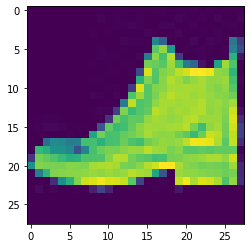

2
This is a Sandal


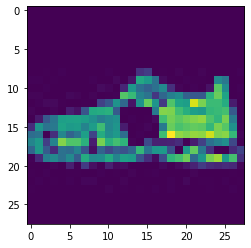

5
This is a truck


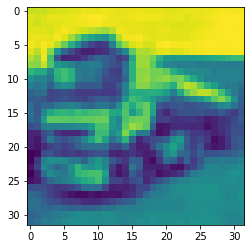

3
This is a automobile


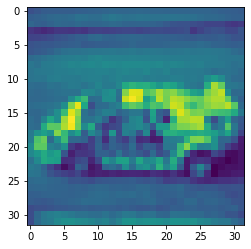

2
This is a Sandal


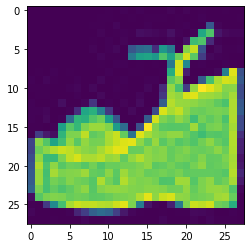

2
This is a Sandal


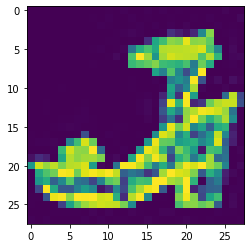

2
This is a Sandal


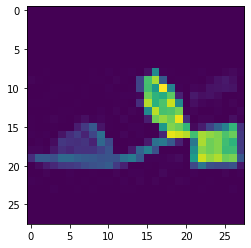

5
This is a truck


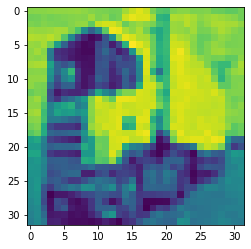

0
This is a Ankle boot


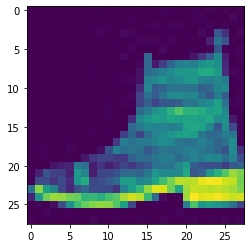

5
This is a truck


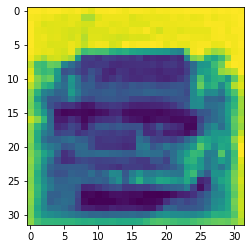

5
This is a truck


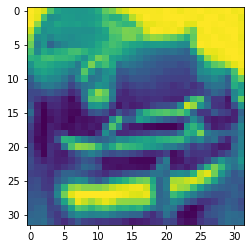

2
This is a Sandal


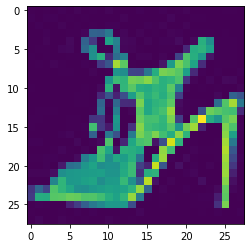

0
This is a Ankle boot


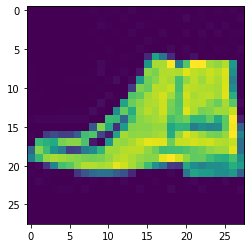

5
This is a truck


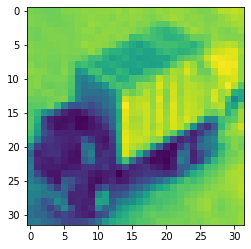

2
This is a Sandal


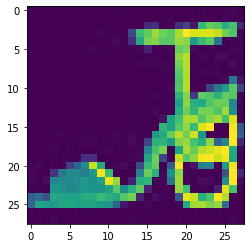

3
This is a automobile


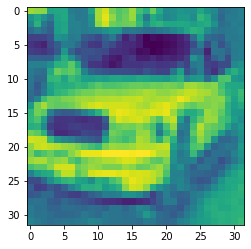

5
This is a truck


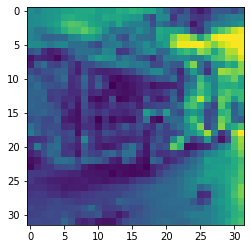

3
This is a automobile


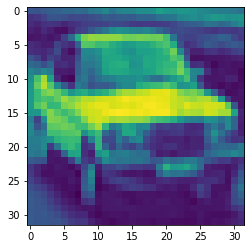

3
This is a automobile


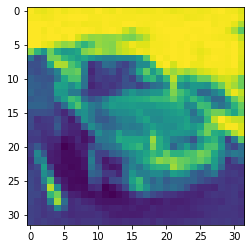

5
This is a truck


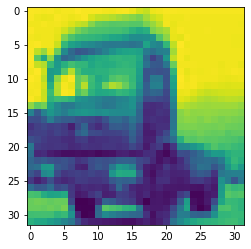

0
This is a Ankle boot


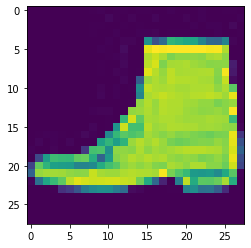

5
This is a truck


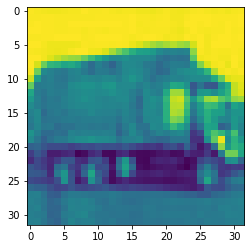

5
This is a truck


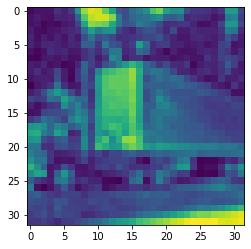

3
This is a automobile


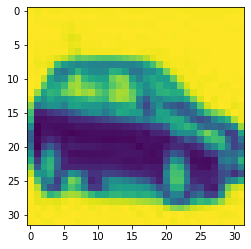

3
This is a automobile


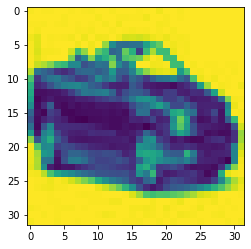

2
This is a Sandal


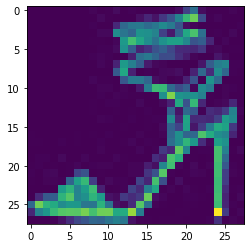

4
This is a bird


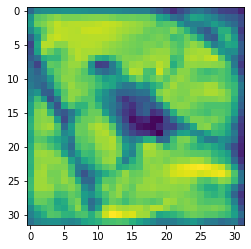

5
This is a truck


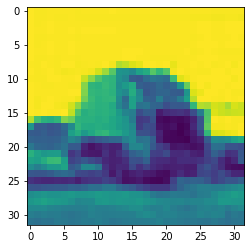

4
This is a bird


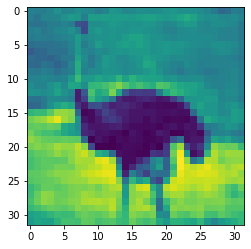

4
This is a bird


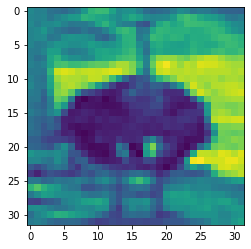

5
This is a truck


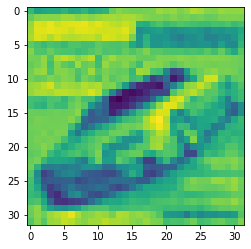

0
This is a Ankle boot


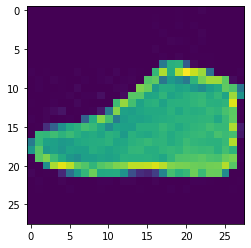

0
This is a Ankle boot


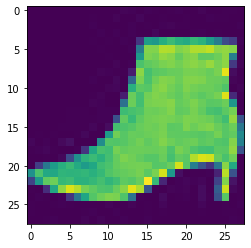

4
This is a bird


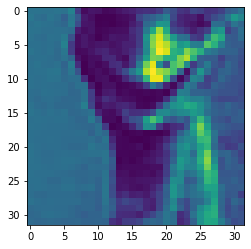

2
This is a Sandal


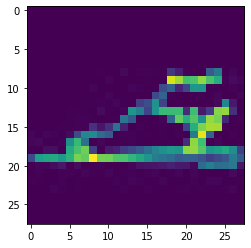

1
This is a Bag


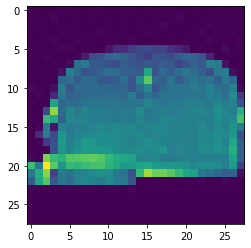

1
This is a Bag


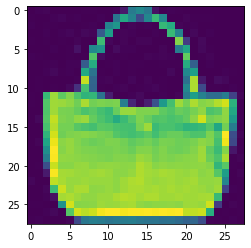

2
This is a Sandal


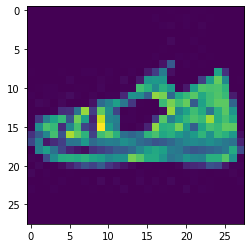

5
This is a truck


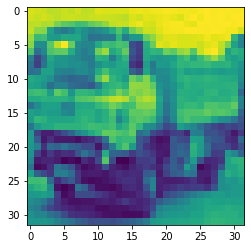

5
This is a truck


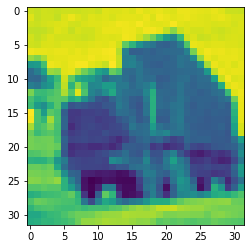

1
This is a Bag


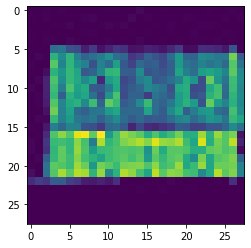

1
This is a Bag


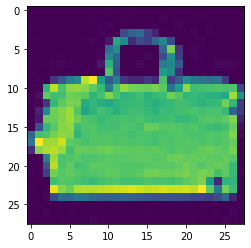

5
This is a truck


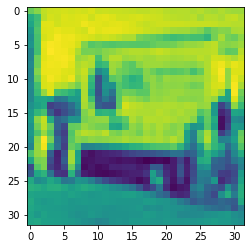

4
This is a bird


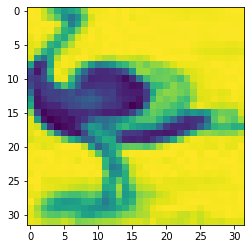

5
This is a truck


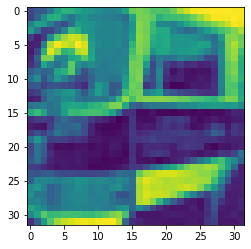

1
This is a Bag


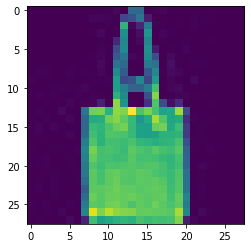

1
This is a Bag


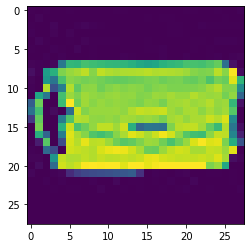

2
This is a Sandal


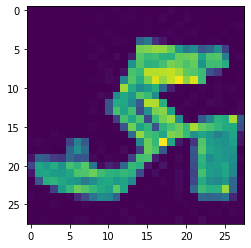

0
This is a Ankle boot


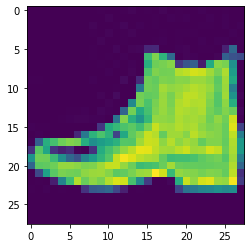

1
This is a Bag


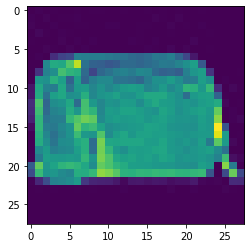

1
This is a Bag


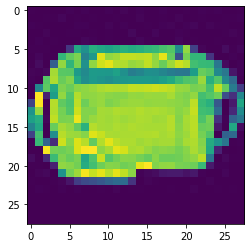

2
This is a Sandal


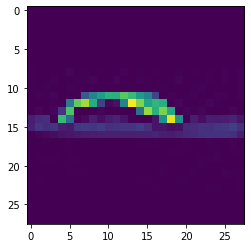

3
This is a automobile


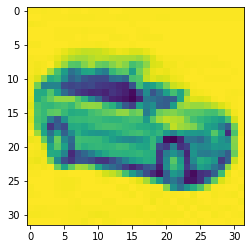

5
This is a truck


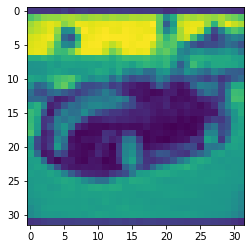

3
This is a automobile


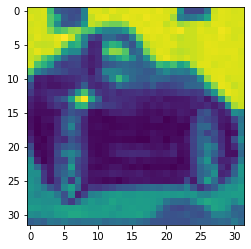

1
This is a Bag


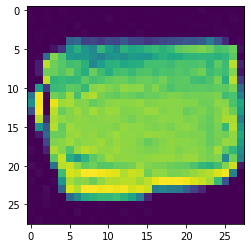

2
This is a Sandal


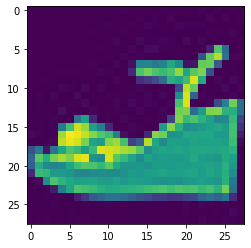

5
This is a truck


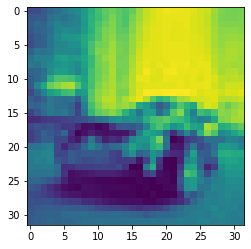

0
This is a Ankle boot


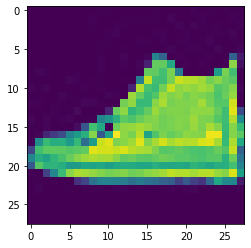

2
This is a Sandal


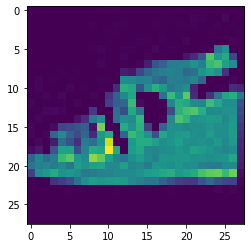

1
This is a Bag


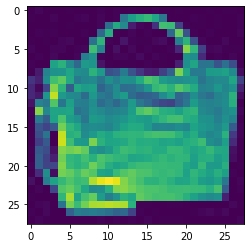

4
This is a bird


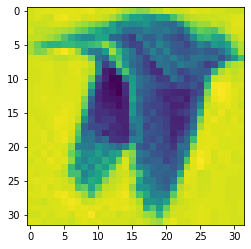

2
This is a Sandal


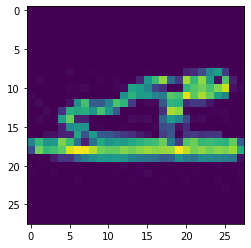

1
This is a Bag


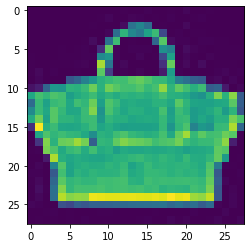

3
This is a automobile


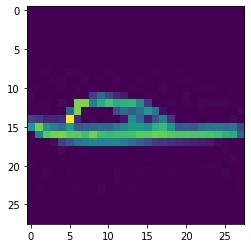

2
This is a Sandal


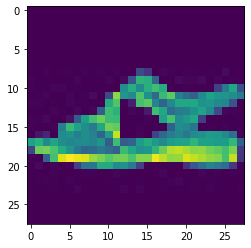

1
This is a Bag


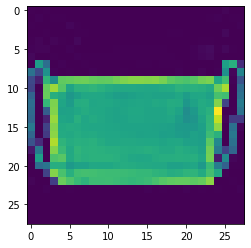

0
This is a Ankle boot


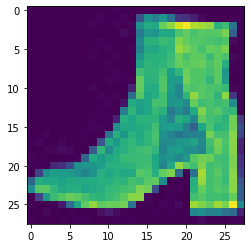

1
This is a Bag


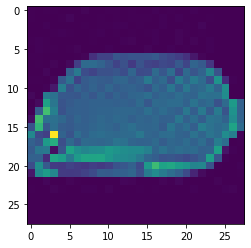

2
This is a Sandal


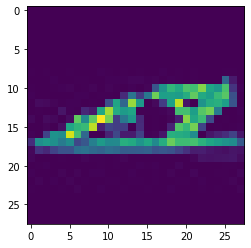

4
This is a bird


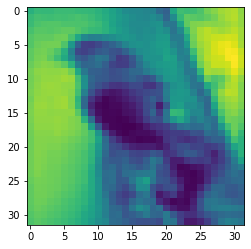

0
This is a Ankle boot


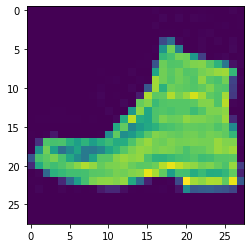

4
This is a bird


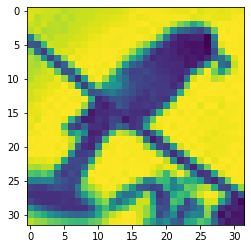

2
This is a Sandal


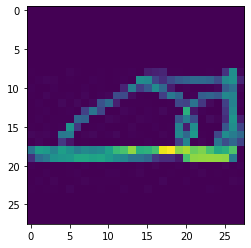

2
This is a Sandal


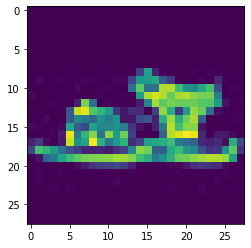

3
This is a automobile


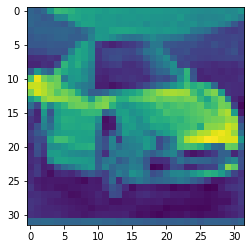

1
This is a Bag


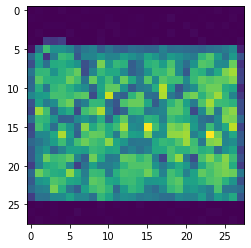

5
This is a truck


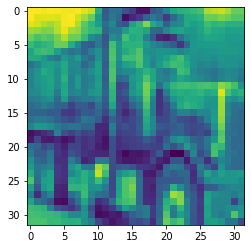

0
This is a Ankle boot


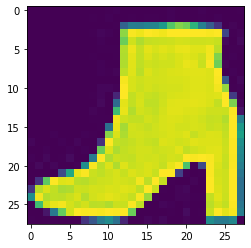

5
This is a truck


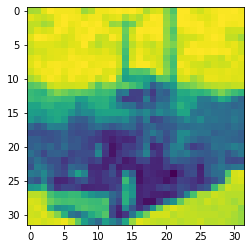

3
This is a automobile


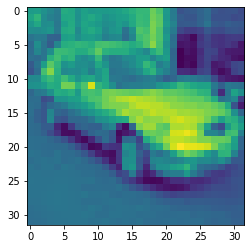

0
This is a Ankle boot


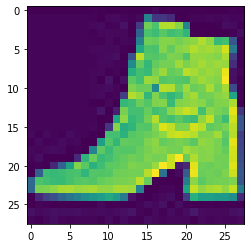

5
This is a truck


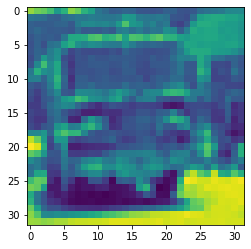

3
This is a automobile


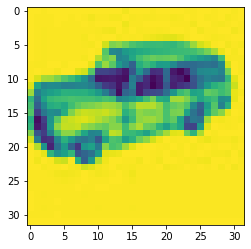

5
This is a truck


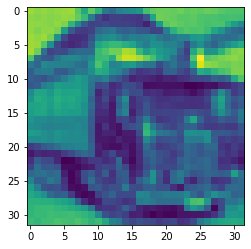

1
This is a Bag


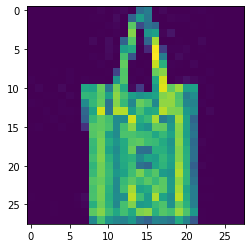

5
This is a truck


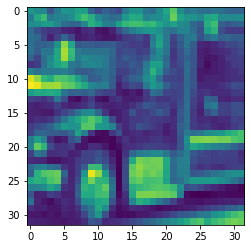

0
This is a Ankle boot


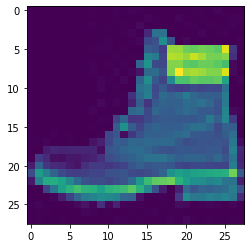

3
This is a automobile


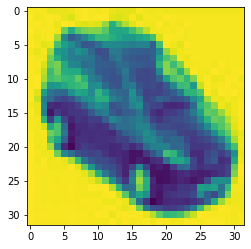

5
This is a truck


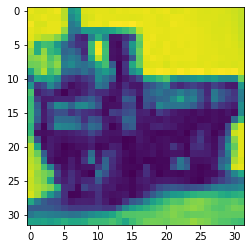

2
This is a Sandal


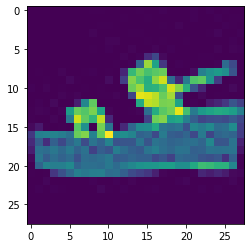

0
This is a Ankle boot


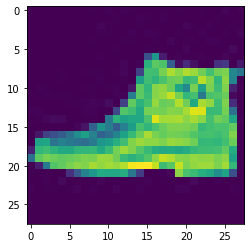

4
This is a bird


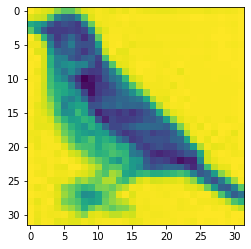

5
This is a truck


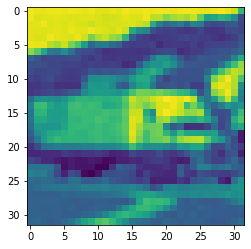

0
This is a Ankle boot


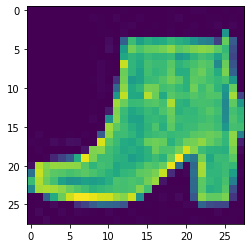

3
This is a automobile


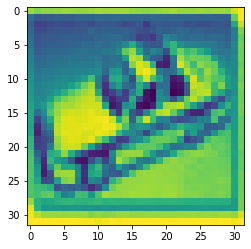

1
This is a Bag


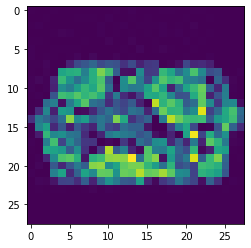

1
This is a Bag


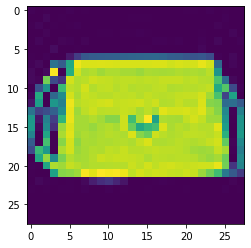

0
This is a Ankle boot


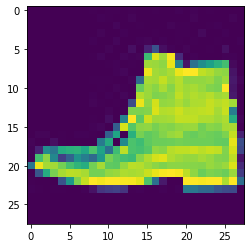

3
This is a automobile


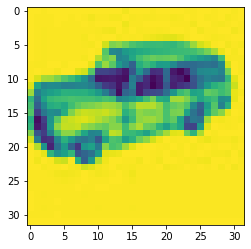

1
This is a Bag


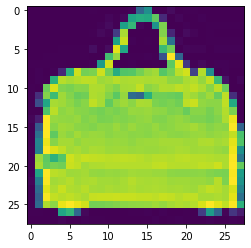

2
This is a Sandal


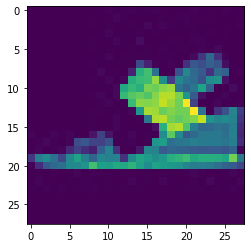

5
This is a truck


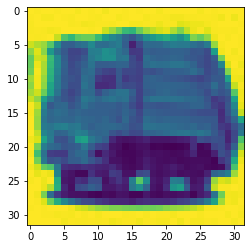

1
This is a Bag


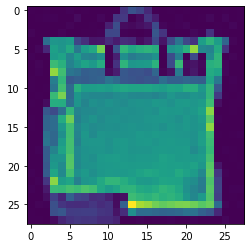

5
This is a truck


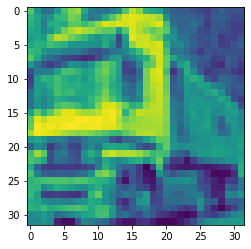

2
This is a Sandal


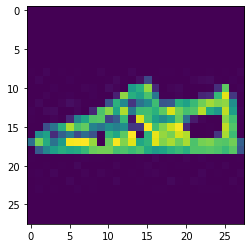

1
This is a Bag


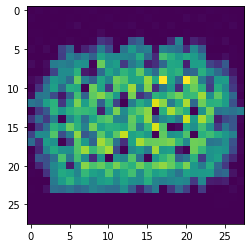

5
This is a truck


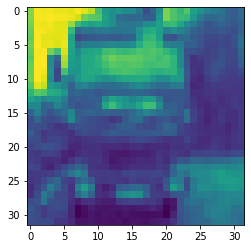

1
This is a Bag


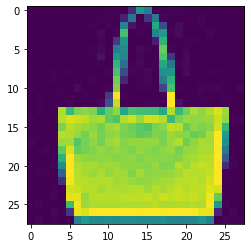

4
This is a bird


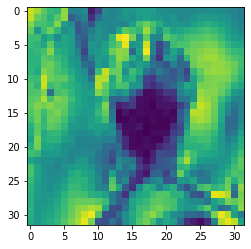

2
This is a Sandal


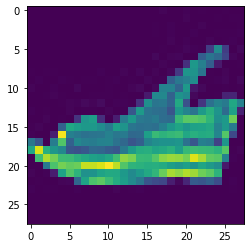

0
This is a Ankle boot


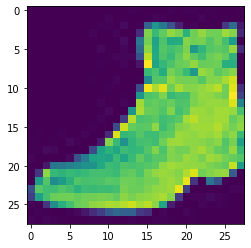

4
This is a bird


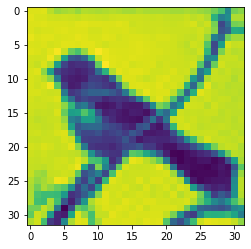

5
This is a truck


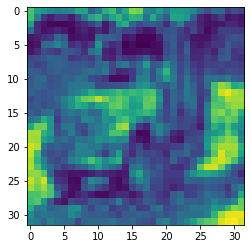

4
This is a bird


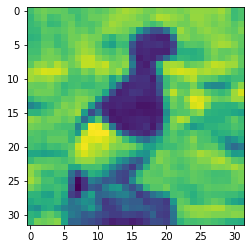

2
This is a Sandal


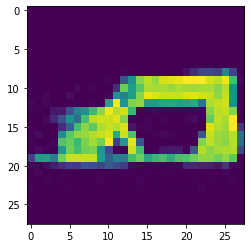

4
This is a bird


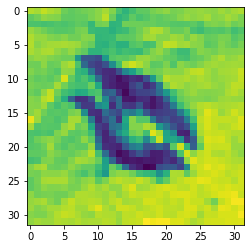

5
This is a truck


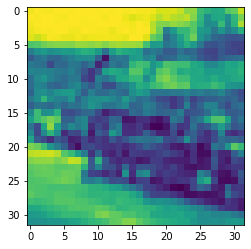

0
This is a Ankle boot


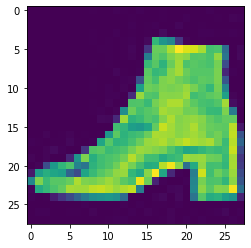

0
This is a Ankle boot


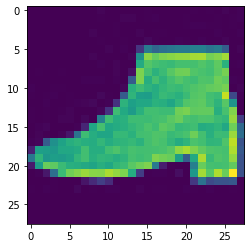

5
This is a truck


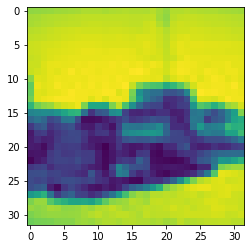

5
This is a truck


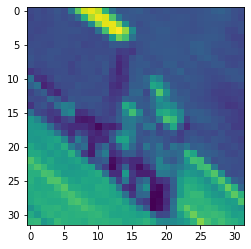

0
This is a Ankle boot


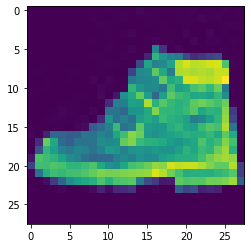

1
This is a Bag


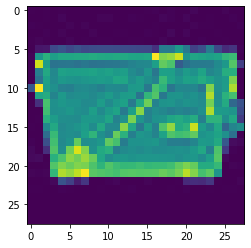

5
This is a truck


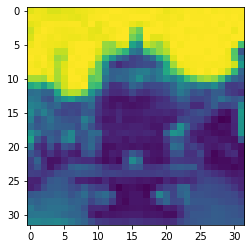

5
This is a truck


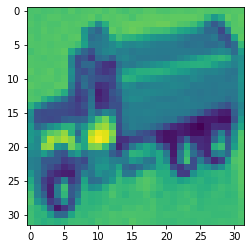

2
This is a Sandal


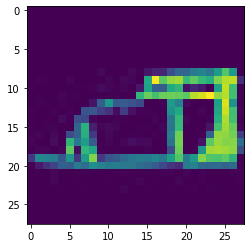

3
This is a automobile


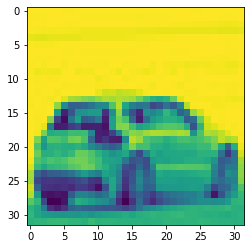

5
This is a truck


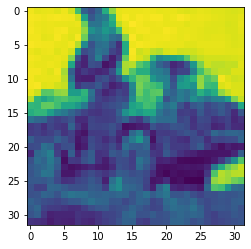

0
This is a Ankle boot


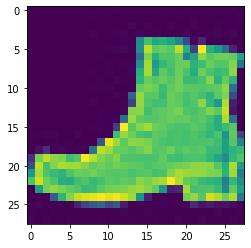

1
This is a Bag


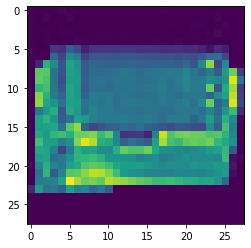

2
This is a Sandal


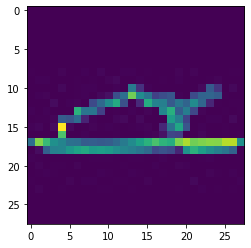

4
This is a bird


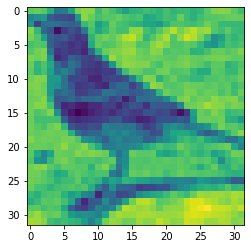

1
This is a Bag


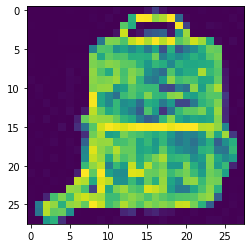

2
This is a Sandal


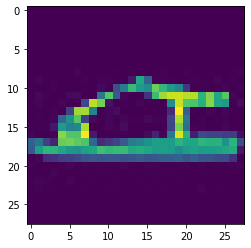

4
This is a bird


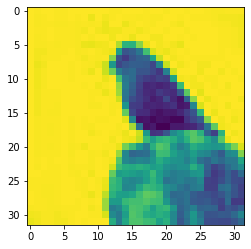

5
This is a truck


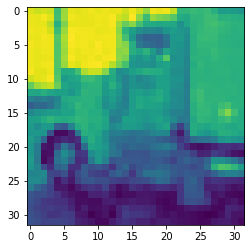

5
This is a truck


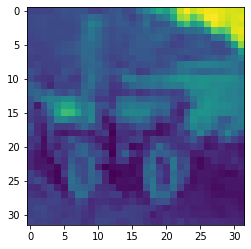

5
This is a truck


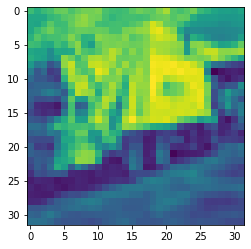

5
This is a truck


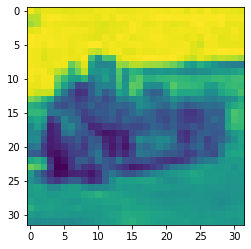

2
This is a Sandal


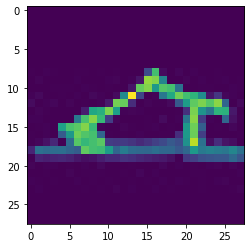

4
This is a bird


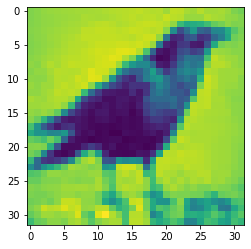

3
This is a automobile


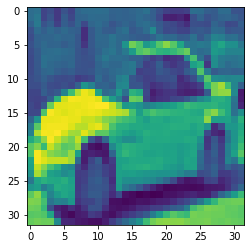

5
This is a truck


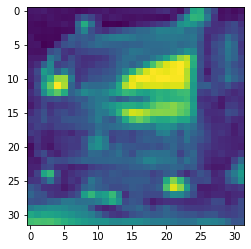

5
This is a truck


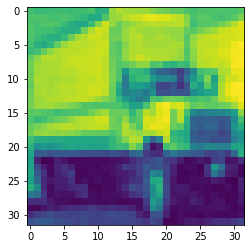

4
This is a bird


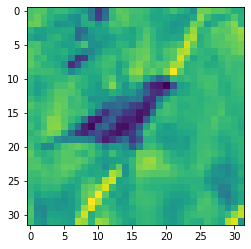

1
This is a Bag


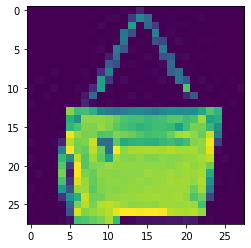

4
This is a bird


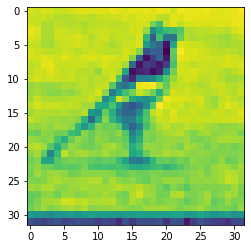

0
This is a Ankle boot


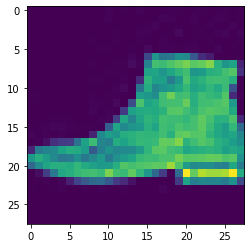

0
This is a Ankle boot


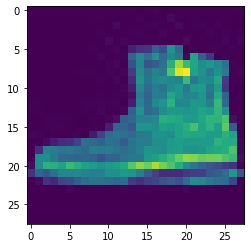

3
This is a automobile


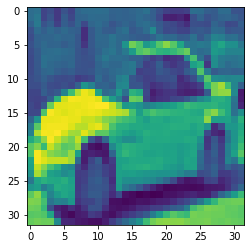

5
This is a truck


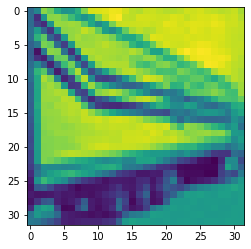

1
This is a Bag


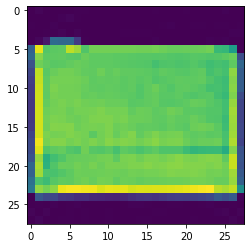

5
This is a truck


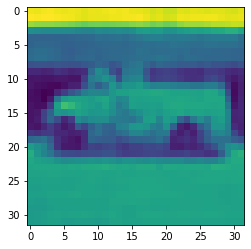

2
This is a Sandal


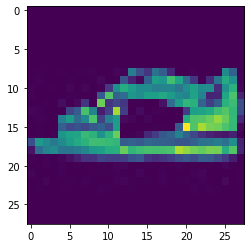

0
This is a Ankle boot


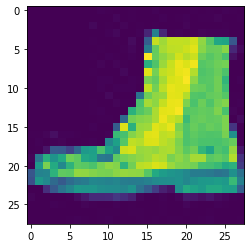

5
This is a truck


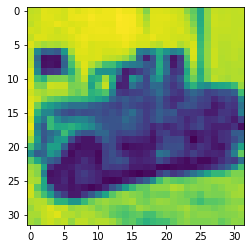

0
This is a Ankle boot


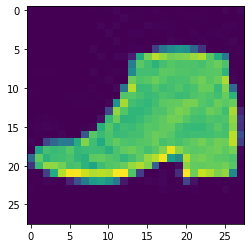

2
This is a Sandal


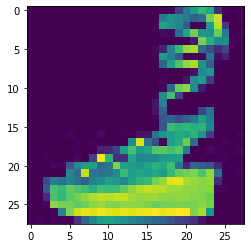

5
This is a truck


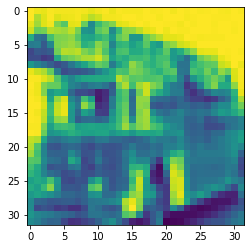

4
This is a bird


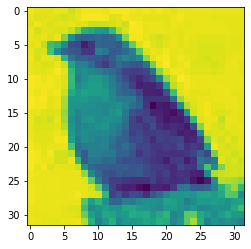

3
This is a automobile


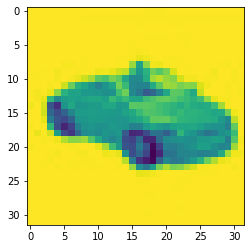

3
This is a automobile


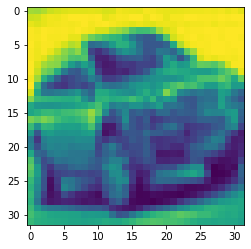

3
This is a automobile


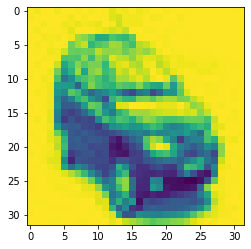

3
This is a automobile


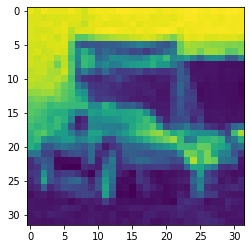

3
This is a automobile


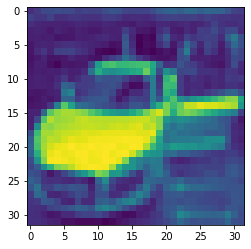

0
This is a Ankle boot


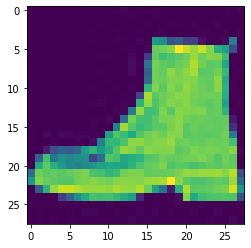

4
This is a bird


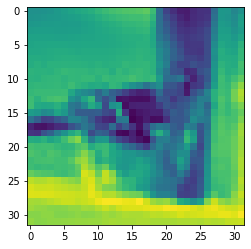

In [13]:
#Prediction

import numpy as np
import keras.models
from keras.models import model_from_json
# from scipy.misc import imread, imresize,imshow
import matplotlib.pyplot as plt
import cv2


json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load woeights into new model
loaded_model.load_weights("model.h5")
print("Loaded Model from disk")



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
import scipy.misc
import glob

path = glob.glob('Test_Images/*.jpg')

for p in path:
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if img.shape[0] == 28:
        img = np.asarray(img)
        img  = np.reshape(img, (28,28))
        
        pred = loaded_model.predict(img.reshape(1, 28, 28, 1))
        print(pred.argmax())

        if (pred.argmax() == 0):
            print('This is a Ankle boot')
        if (pred.argmax() == 1):
            print('This is a Bag')
        if (pred.argmax() == 2):
            print('This is a Sandal')
        if (pred.argmax() == 3):
            print('This is a automobile')
        if (pred.argmax() == 4):
            print('This is a bird')
        if (pred.argmax() == 5):
            print('This is a truck')

        plt.imshow(img)
        plt.show()

        
    if img.shape[0] == 32:
        img = np.asarray(img)
        img1  = np.reshape(img, (32,32))
        img  = np.resize(img, (28,28))
        
        
        pred = loaded_model.predict(img.reshape(1, 28, 28, 1))
        print(pred.argmax())

        if (pred.argmax() == 0):
            print('This is a Ankle boot')
        if (pred.argmax() == 1):
            print('This is a Bag')
        if (pred.argmax() == 2):
            print('This is a Sandal')
        if (pred.argmax() == 3):
            print('This is a automobile')
        if (pred.argmax() == 4):
            print('This is a bird')
        if (pred.argmax() == 5):
            print('This is a truck')

        plt.imshow(img1)
        plt.show()



In [23]:
# Explaination:

''' From starting, I have read "gen_img_data.json" file, in which 6 classes and its names is 
['Ankle boot', 'Bag', 'Sandal', 'automobile', 'bird', 'truck']. There are 23702 total images. 
Each classes has following number of images.

Bag = 6000
Sandal = 1201
Ankle boot = 6000
automobile = 501
truck = 5000
bird = 5000

The Model Accuracy is 

Train Accuracy = 0.9911
Test Accuracy = 0.9468


Predication Result: 

1. I have random 50 images of each classes for testing.
2. Some miss classifiaction between automobile and truck because of class imbalance.

'''


import json

with open("gen_img_data.json", "r") as read_file:
    data = json.load(read_file)
    

Imgs = [v for f in data for k , v in f.items()]
labels = [k for f in data for k , v in f.items()]

print("Total Image length", len(Imgs))

Baglist , Sandalist , Anklebootlist , automobilelist , trucklist , birdlist = [],[],[],[],[],[]

for l in labels:
    if l == 'Bag':
        Baglist.append(l)
    if l == 'Sandal':
        Sandalist.append(l)
    if l == 'Ankle boot':
        Anklebootlist.append(l)
    if l == 'automobile':
        automobilelist.append(l)
    if l == 'truck':
        trucklist.append(l)
    if l == 'bird':
        birdlist.append(l)
        
Allclasses = [Baglist , Sandalist , Anklebootlist , automobilelist , trucklist , birdlist]      
for i in Allclasses:
    print(len(i))

Total Image length 23702
6000
1201
6000
501
5000
5000
